In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /u/kirushi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /u/kirushi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
from datasets import load_dataset

data_files = {
    'train': 'data/train.csv',
    'test': 'data/test.csv'
}

complaints = load_dataset('csv', data_files=data_files)

In [4]:
complaints

DatasetDict({
    train: Dataset({
        features: ['category', 'sub_category', 'crimeaditionalinfo'],
        num_rows: 93686
    })
    test: Dataset({
        features: ['category', 'sub_category', 'crimeaditionalinfo'],
        num_rows: 31229
    })
})

In [5]:
train = complaints["train"]
train

Dataset({
    features: ['category', 'sub_category', 'crimeaditionalinfo'],
    num_rows: 93686
})

In [6]:
train[0]

{'category': 'Online and Social Media Related Crime',
 'sub_category': 'Cyber Bullying  Stalking  Sexting',
 'crimeaditionalinfo': 'I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with  Only Girls  and still getting calls from unknown numbers pls help me and sort out the issue  as soon as possible Thank you'}

In [7]:
train.column_names

['category', 'sub_category', 'crimeaditionalinfo']

In [8]:
train.features

{'category': Value(dtype='string', id=None),
 'sub_category': Value(dtype='string', id=None),
 'crimeaditionalinfo': Value(dtype='string', id=None)}

In [9]:
print(train[:5])

{'category': ['Online and Social Media Related Crime', 'Online Financial Fraud', 'Online Gambling  Betting', 'Online and Social Media Related Crime', 'Online Financial Fraud'], 'sub_category': ['Cyber Bullying  Stalking  Sexting', 'Fraud CallVishing', 'Online Gambling  Betting', 'Online Job Fraud', 'Fraud CallVishing'], 'crimeaditionalinfo': ['I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with  Only Girls  and still getting calls from unknown numbers pls help me and sort out the issue  as soon as possible Thank you', 'The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake  cropped nude photos of me to my other contacts through WhatsApp\r\n\r\nI am unaware how he has recieved my contacts list from my phone\r\n\r\nPlease help', 'He is acting like a police and demanding for money by adding sections in the text messages \r\nI request you to take an immediate act

In [11]:
complaints.set_format("pandas")

df = complaints["train"][:]
df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [12]:
df.shape

(93686, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [14]:
print(pd.Series({"Number of observations with missing values": len(df) - len(df.dropna()),
                 "Number of duplicate observations": df.duplicated().sum()}).to_string())

Number of observations with missing values    6612
Number of duplicate observations              7803


In [15]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

In [16]:
df.shape

(85883, 3)

In [17]:
for col in df.columns:
    print(f'Column: {col}, number of missing values: {df[col].isnull().sum()}')

Column: category, number of missing values: 0
Column: sub_category, number of missing values: 3858
Column: crimeaditionalinfo, number of missing values: 7


In [18]:
df.dropna(subset=['crimeaditionalinfo'],inplace=True)

In [19]:
missing_sub_category = df[train['sub_category'].isnull()]
missing_sub_category.head()

,category,sub_category,crimeaditionalinfo
8,RapeGang Rape RGRSexually Abusive Content,None,I got the message on Whatsapp to my number The...
25,RapeGang Rape RGRSexually Abusive Content,None,Respected Sir\r\n\r\nA very serious matter I w...
39,Sexually Explicit Act,None,httpswwwxnxxtvvideousapbfuckkkarrr\r\n\r\n Abo...
45,Sexually Obscene material,None,Many fake accounts are created and Im sufferin...
49,Sexually Explicit Act,None,SirMaam \r\nThis is my third report on this re...


In [20]:
missing_sub_category['category'].value_counts()

category
Online Financial Fraud                                  3623
Online and Social Media Related Crime                    926
Any Other Cyber Crime                                    782
Cyber Attack/ Dependent Crimes                           233
Sexually Obscene material                                133
Hacking  Damage to computercomputer system etc           108
Sexually Explicit Act                                     97
Cryptocurrency Crime                                      26
RapeGang Rape RGRSexually Abusive Content                 24
Online Gambling  Betting                                  23
Child Pornography CPChild Sexual Abuse Material CSAM      22
Cyber Terrorism                                           13
Online Cyber Trafficking                                   9
Ransomware                                                 3
Name: count, dtype: int64

In [21]:
df['category'].value_counts()

category
Online Financial Fraud                                  52496
Online and Social Media Related Crime                   12076
Any Other Cyber Crime                                   10811
Cyber Attack/ Dependent Crimes                           3608
Sexually Obscene material                                1764
Hacking  Damage to computercomputer system etc           1709
Sexually Explicit Act                                    1489
Cryptocurrency Crime                                      473
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      357
RapeGang Rape RGRSexually Abusive Content                 248
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64

In [22]:
df['sub_category'].fillna('',inplace=True)

In [23]:
len(df['category'].unique())

15

In [24]:
len(df['sub_category'].unique())

36

In [25]:
grouped_counts = df.groupby(['category', 'sub_category']).size()

print("\nCounts grouped by category and sub_category:")
print(grouped_counts)


Counts grouped by category and sub_category:
category                                              sub_category                                                        
Any Other Cyber Crime                                 Other                                                                   10811
Child Pornography CPChild Sexual Abuse Material CSAM                                                                            357
Cryptocurrency Crime                                  Cryptocurrency Fraud                                                      473
Cyber Attack/ Dependent Crimes                        Data Breach/Theft                                                         484
                                                      Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks      504
                                                      Hacking/Defacement                                                        540
                                       

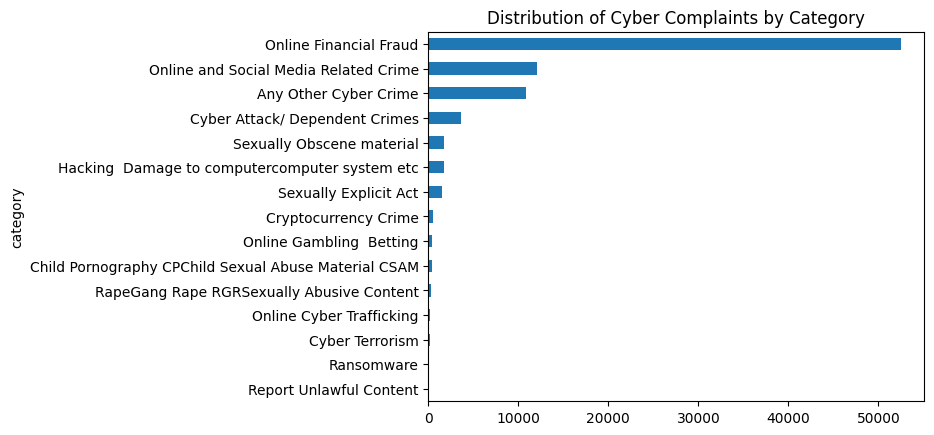

In [26]:
df["category"].value_counts(ascending=True).plot.barh()
plt.title('Distribution of Cyber Complaints by Category')
plt.show()

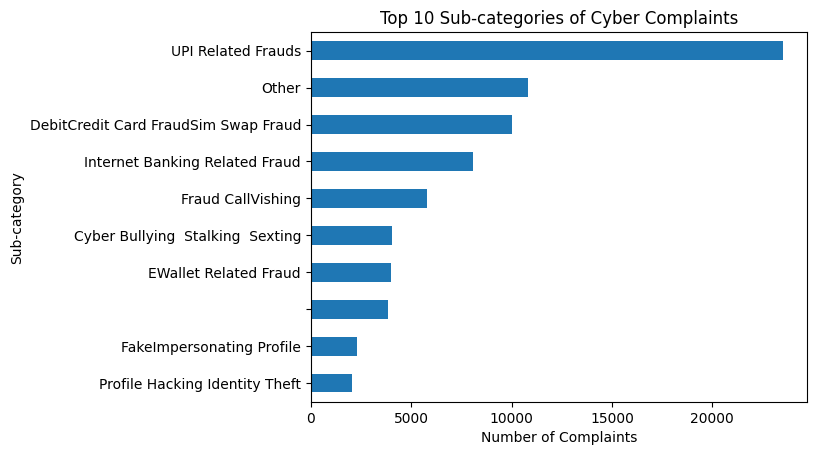

In [32]:
df['sub_category'].value_counts(ascending=True).tail(10).plot(kind='barh')
plt.title('Top 10 Sub-categories of Cyber Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Sub-category')
plt.show()

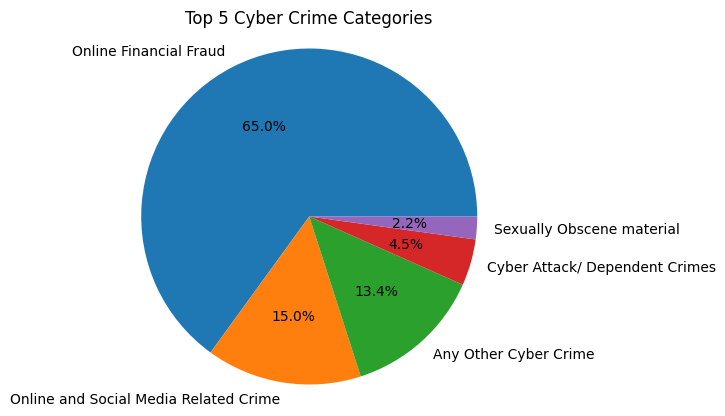

In [34]:
# Pie chart of top 5 categories
top_categories = df['category'].value_counts().head(5)
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%')
plt.title('Top 5 Cyber Crime Categories')
plt.axis('equal')
plt.show()

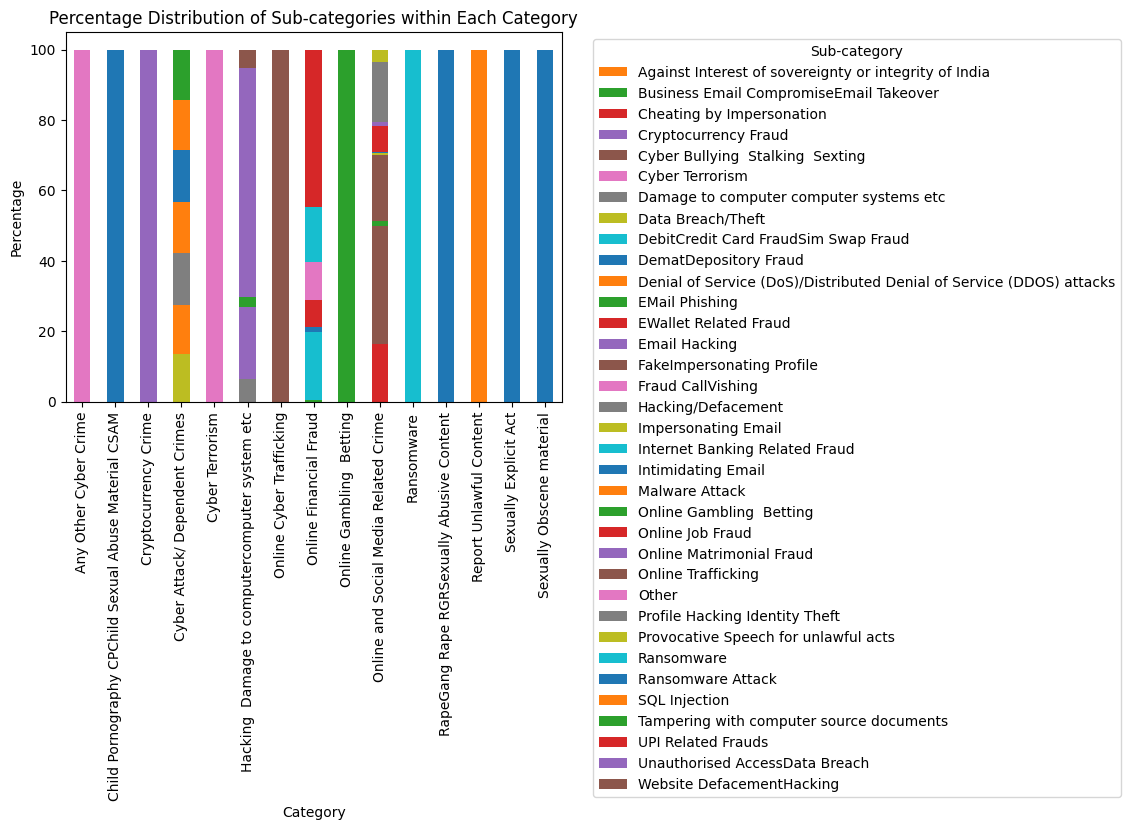

In [35]:
# Create percentage stacked bar chart
cat_subcat_counts = df.groupby(['category', 'sub_category']).size().unstack(fill_value=0)
cat_subcat_percentages = cat_subcat_counts.div(cat_subcat_counts.sum(axis=1), axis=0) * 100

cat_subcat_percentages.plot(kind='bar', stacked=True)
plt.title('Percentage Distribution of Sub-categories within Each Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Sub-category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

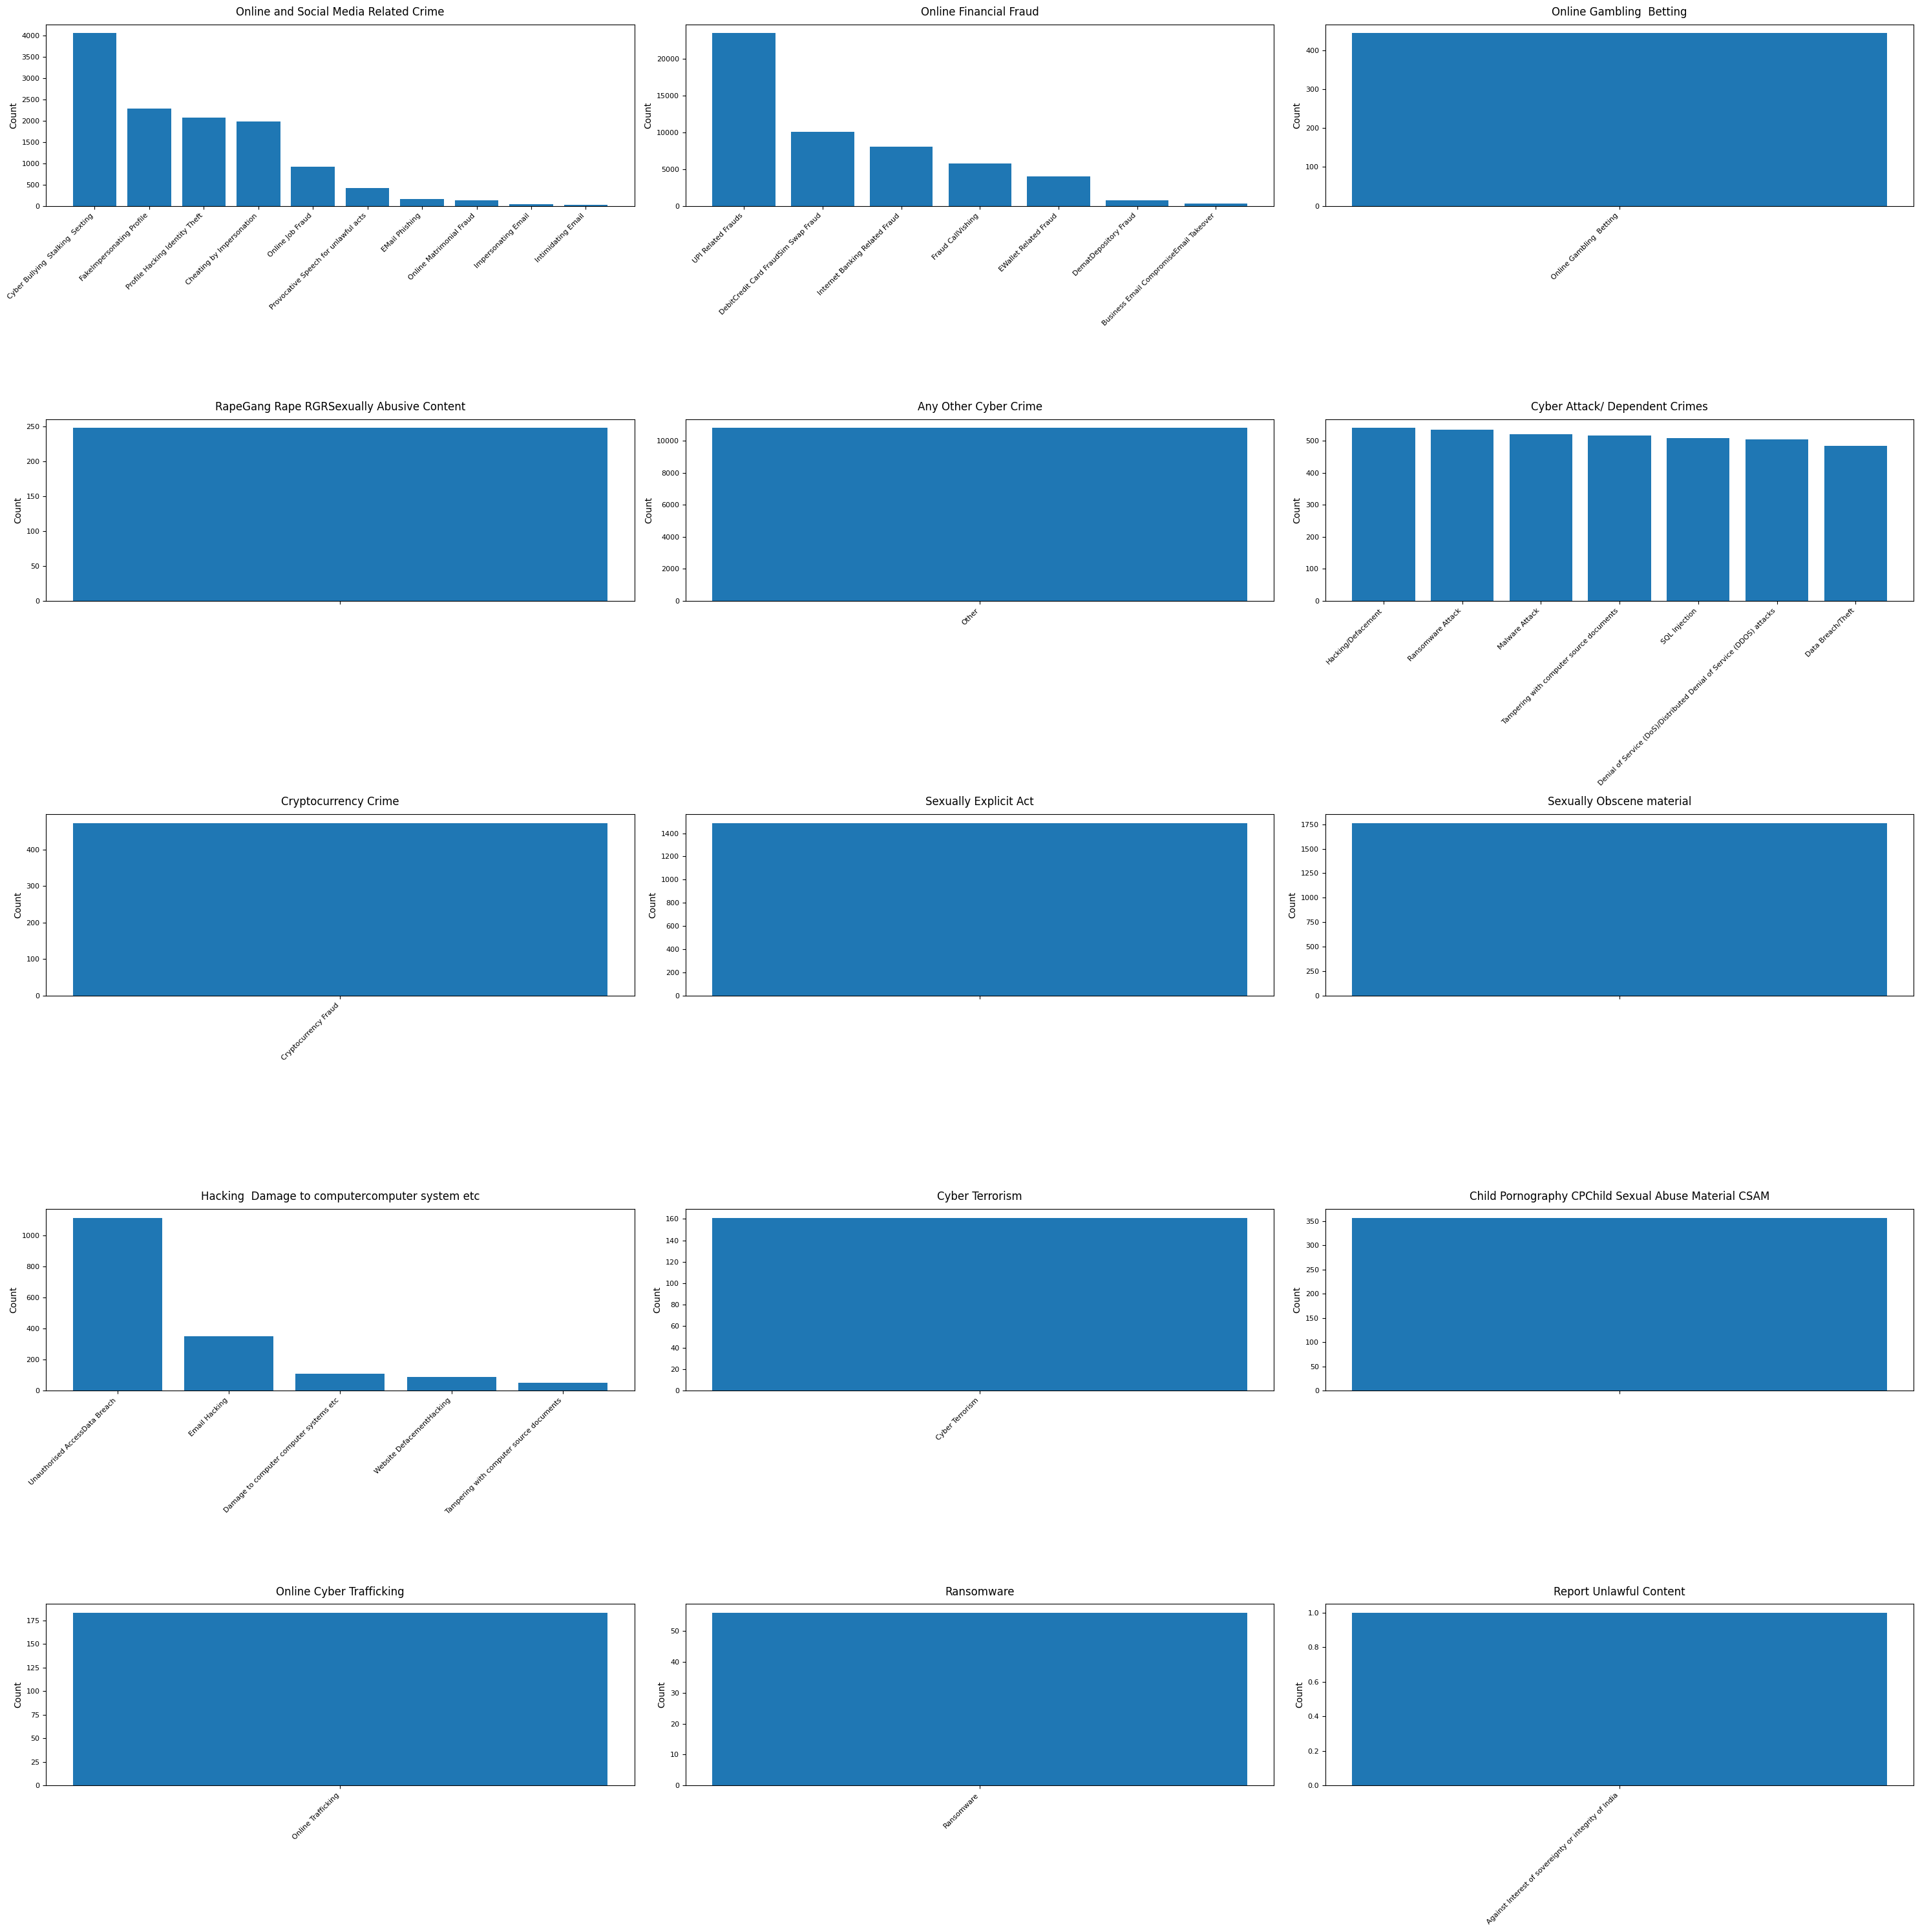

In [37]:
# Create a large figure for all subplots
fig = plt.figure(figsize=(30, 30))

# Calculate number of rows and columns needed
n_rows = 5
n_cols = 3

# Loop through each unique category
for idx, category in enumerate(df['category'].unique(), 1):
    # Create subplot
    plt.subplot(n_rows, n_cols, idx)
    
    # Get data for current category
    category_data = df[df['category'] == category]
    subcat_counts = category_data['sub_category'].value_counts()
    
    # Create bar plot
    plt.bar(range(len(subcat_counts)), subcat_counts.values)
    
    # Customize the subplot
    plt.title(f'{category}', fontsize=12, pad=10)
    plt.ylabel('Count', fontsize=10)
    
    # Set x-axis labels
    plt.xticks(range(len(subcat_counts)), subcat_counts.index, 
               rotation=45, ha='right', fontsize=8)
    
    # Adjust y-axis labels
    plt.yticks(fontsize=8)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

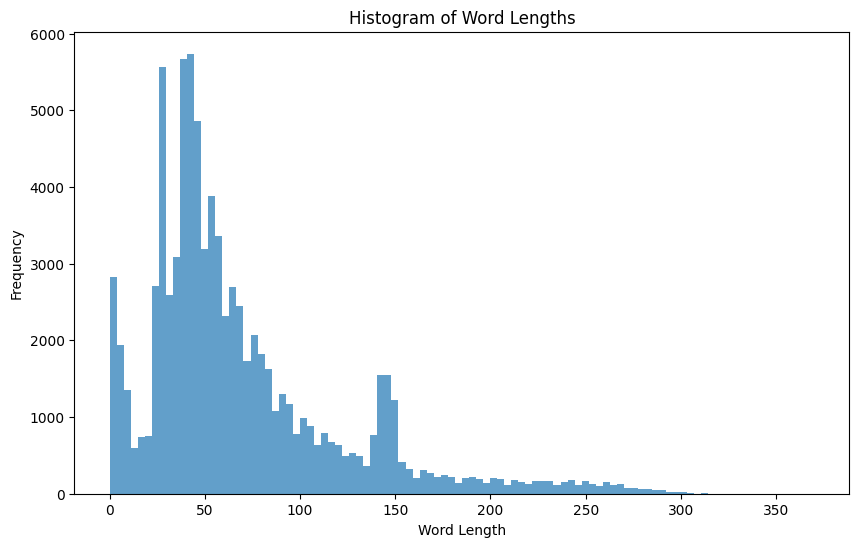

In [40]:
# Text length analysis
df['text_length'] = df['crimeaditionalinfo'].str.split().apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['text_length'].explode().dropna(), bins=100, alpha=0.7)
plt.title('Histogram of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

In [44]:
pd.cut(df['text_length'], bins=list(range(0,400,20))).value_counts()

text_length
(40, 60]      21833
(20, 40]      20036
(60, 80]      11866
(0, 20]        6916
(80, 100]      6646
(140, 160]     5132
(100, 120]     4020
(120, 140]     2965
(160, 180]     1353
(180, 200]      995
(200, 220]      871
(220, 240]      813
(240, 260]      774
(260, 280]      520
(280, 300]      214
(300, 320]       35
(360, 380]        1
(320, 340]        0
(340, 360]        0
Name: count, dtype: int64

In [75]:
import re, string
from nltk.tokenize import word_tokenize

# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

# Dictionary of acronyms
acronyms_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth


In [76]:
def convert_acronyms(text):
    words = []
    for word in word_tokenize(text):
        if word in list(acronyms_dict.keys()):
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

In [77]:
contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')
contractions_dict.head()

'aight         alright
ain't          are not
amn't           am not
arencha    are not you
aren't         are not
dtype: object

In [78]:
def convert_contractions(text):
    words = []
    for word in word_tokenize(text):
        if word in list(contractions_dict.keys()):
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted


In [79]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in word_tokenize(text) if word not in stop_words])

In [80]:
from spellchecker import SpellChecker

spell = SpellChecker()

def pyspellchecker(text):
    word_list = word_tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

In [81]:
import spacy
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    return text_spacy

In [93]:
def text_normalizer(batch):
    text = str(batch["crimeaditionalinfo"])
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = pyspellchecker(text)
    # text = text_stemmer(text)
    # text = text_lemmatizer(text)
    text = remove_stopwords(text)
    batch["crimeaditionalinfo"] = text
    return batch

In [ ]:
complaints_clean = complaints.map(text_normalizer,batched=False)